In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
sns.set()


In [2]:
df = pd.read_csv("flight_status_in_2019.csv",low_memory=False)

In [3]:
# Data representation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 30 columns):
YEAR                   int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
OP_UNIQUE_CARRIER      object
TAIL_NUM               object
OP_CARRIER_FL_NUM      int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed:

In [4]:
df.shape

(8091684, 30)

In [6]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2019,1,16,3,2019-01-16,AA,N150UW,544,BOS,PHL,...,78.0,61.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,17,4,2019-01-17,AA,N563UW,544,BOS,PHL,...,97.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,18,5,2019-01-18,AA,N921US,544,BOS,PHL,...,90.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,19,6,2019-01-19,AA,N604AW,544,BOS,PHL,...,98.0,64.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,20,7,2019-01-20,AA,N975UY,544,BOS,PHL,...,NaN,NaN,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN


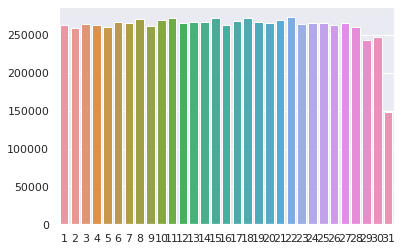

In [7]:
flights_years = df.DAY_OF_MONTH.value_counts()
sns.barplot(x=flights_years.index, y=flights_years.values)

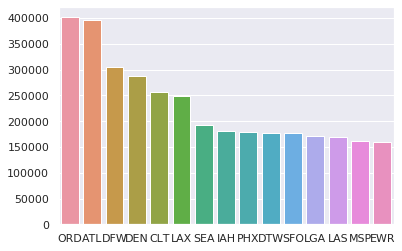

In [8]:
org = df.ORIGIN.value_counts().head(15)
sns.barplot(x=org.index, y=org.values)

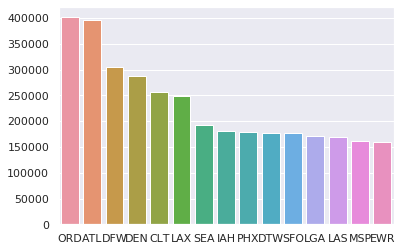

In [9]:
des = df.DEST.value_counts().head(15)
sns.barplot(x=des.index, y=des.values)

In [10]:
df = df.drop(columns=['CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY','DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE','LATE_AIRCRAFT_DELAY', 'Unnamed: 29'])

In [11]:
import networkx as nx
FG = nx.from_pandas_edgelist(df, source='ORIGIN', target='DEST', edge_attr=True,)

In [12]:
FG.node()

NodeView(('BOS', 'PHL', 'CLT', 'DCA', 'PHX', 'ONT', 'RNO', 'SFO', 'SAT', 'DTW', 'PBI', 'IAD', 'LAX', 'CMH', 'DFW', 'ALB', 'ATL', 'MCO', 'SAN', 'SEA', 'ORD', 'BWI', 'RSW', 'DSM', 'PIT', 'DEN', 'SMF', 'MCI', 'RIC', 'SJC', 'OKC', 'LAS', 'STL', 'PWM', 'SLC', 'FLL', 'RDU', 'LGA', 'CLE', 'JFK', 'MIA', 'GSP', 'SJU', 'IAH', 'ORF', 'EWR', 'ICT', 'PVD', 'PDX', 'MSY', 'JAX', 'MEM', 'STX', 'BNA', 'SYR', 'BUF', 'SNA', 'CHS', 'MSP', 'CAE', 'BDL', 'TPA', 'PSP', 'TUS', 'JAC', 'HNL', 'IND', 'ELP', 'COS', 'TUL', 'AUS', 'EGE', 'STT', 'OMA', 'FAT', 'XNA', 'BZN', 'MSN', 'SHV', 'AVP', 'ABI', 'LFT', 'GRK', 'TYS', 'GSO', 'CVG', 'MGM', 'CMI', 'COU', 'LEX', 'SGF', 'ROC', 'LCH', 'PNS', 'GJT', 'CLL', 'MLI', 'CHO', 'BPT', 'GCK', 'MAF', 'AEX', 'GRR', 'SAV', 'ACT', 'DAY', 'EVV', 'TYR', 'BMI', 'SPS', 'ATW', 'MHK', 'MQT', 'HOU', 'CWA', 'ROA', 'ALO', 'ILM', 'CRP', 'MLU', 'MDT', 'TXK', 'LBB', 'LIT', 'TLH', 'EYW', 'LRD', 'GNV', 'FWA', 'CID', 'BHM', 'SWO', 'RST', 'SDF', 'SJT', 'DBQ', 'MFE', 'DAL', 'MDW', 'OAK', 'MKE', 'AB

In [13]:
FG.edges()

EdgeView([('BOS', 'PHL'), ('BOS', 'MIA'), ('BOS', 'LAX'), ('BOS', 'DFW'), ('BOS', 'ORD'), ('BOS', 'PHX'), ('BOS', 'CLT'), ('BOS', 'JFK'), ('BOS', 'STL'), ('BOS', 'ATL'), ('BOS', 'AUS'), ('BOS', 'BNA'), ('BOS', 'BWI'), ('BOS', 'CMH'), ('BOS', 'DAL'), ('BOS', 'DEN'), ('BOS', 'HOU'), ('BOS', 'IND'), ('BOS', 'MCI'), ('BOS', 'MDW'), ('BOS', 'MKE'), ('BOS', 'MCO'), ('BOS', 'DCA'), ('BOS', 'SEA'), ('BOS', 'LGB'), ('BOS', 'BUF'), ('BOS', 'PBI'), ('BOS', 'SFO'), ('BOS', 'FLL'), ('BOS', 'SAN'), ('BOS', 'LGA'), ('BOS', 'CLE'), ('BOS', 'SLC'), ('BOS', 'RSW'), ('BOS', 'RIC'), ('BOS', 'ROC'), ('BOS', 'SRQ'), ('BOS', 'RDU'), ('BOS', 'MSP'), ('BOS', 'SYR'), ('BOS', 'SJU'), ('BOS', 'LAS'), ('BOS', 'TPA'), ('BOS', 'PIT'), ('BOS', 'CHS'), ('BOS', 'EWR'), ('BOS', 'DTW'), ('BOS', 'JAX'), ('BOS', 'BUR'), ('BOS', 'SAV'), ('BOS', 'MSY'), ('BOS', 'SJC'), ('BOS', 'CVG'), ('BOS', 'PDX'), ('BOS', 'IAH'), ('BOS', 'IAD'), ('BOS', 'MDT'), ('BOS', 'HDN'), ('BOS', 'SMF'), ('BOS', 'ORF'), ('BOS', 'MYR'), ('BOS', 'PSP')

/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


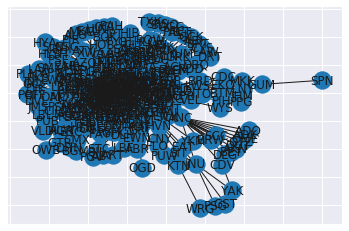

In [14]:
nx.draw_networkx(FG, with_labels=True) 